In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd. set_option('display.max_columns', None)
pd. set_option('display.max_rows', None)
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/atp_matches_2013.csv
/kaggle/input/dataset/atp_matches_2019.csv
/kaggle/input/dataset/atp_matches_2002.csv
/kaggle/input/dataset/atp_matches_2015.csv
/kaggle/input/dataset/atp_matches_2005.csv
/kaggle/input/dataset/atp_matches_2011.csv
/kaggle/input/dataset/atp_matches_2007.csv
/kaggle/input/dataset/atp_matches_2004.csv
/kaggle/input/dataset/atp_matches_2017.csv
/kaggle/input/dataset/atp_matches_2012.csv
/kaggle/input/dataset/atp_matches_2010.csv
/kaggle/input/dataset/atp_matches_2020.csv
/kaggle/input/dataset/atp_matches_2009.csv
/kaggle/input/dataset/atp_matches_2016.csv
/kaggle/input/dataset/atp_matches_2008.csv
/kaggle/input/dataset/atp_matches_2014.csv
/kaggle/input/dataset/atp_matches_2003.csv
/kaggle/input/dataset/atp_matches_2001.csv
/kaggle/input/dataset/atp_matches_2018.csv
/kaggle/input/dataset/atp_matches_2006.csv


In [6]:
import numpy as np
import pandas as pd
import glob
pd. set_option('display.max_columns', None)
pd. set_option('display.max_rows', None)
from IPython.display import Image
from IPython.core.display import HTML
import matplotlib.pyplot as plt
import random
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelBinarizer

from sklearn.model_selection import train_test_split
from sklearn import utils
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from xgboost import XGBClassifier

import shap

In [8]:
path = r'/kaggle/input/dataset' # use your path
path
all_files = glob.glob(path + "/*.csv")
print(len(all_files))
li = []


for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

tennis_df = pd.concat(li, axis=0, ignore_index=True)

20


In [10]:
tennis_df.head(10)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2013-339,Brisbane,Hard,28,A,20121230,1,105357,NaN,Q,John Millman,R,183.0,AUS,23.548255,105147,NaN,NaN,Tatsuma Ito,R,180.0,JPN,24.621492,6-4 6-1,3,R32,86.0,7.0,6.0,69.0,44.0,33.0,11.0,9.0,3.0,4.0,2.0,5.0,53.0,26.0,19.0,8.0,8.0,3.0,7.0,199.0,239.0,79.0,655.0
1,2013-339,Brisbane,Hard,28,A,20121230,2,103720,NaN,WC,Lleyton Hewitt,R,180.0,AUS,31.849418,103857,NaN,LL,Igor Kunitsyn,R,180.0,RUS,31.252567,6-3 4-6 6-2,3,R32,124.0,8.0,2.0,69.0,34.0,29.0,21.0,13.0,1.0,2.0,7.0,5.0,99.0,53.0,37.0,19.0,14.0,6.0,10.0,83.0,625.0,162.0,339.0
2,2013-339,Brisbane,Hard,28,A,20121230,3,104797,NaN,NaN,Denis Istomin,R,188.0,UZB,26.316222,105373,8.0,NaN,Martin Klizan,L,190.0,SVK,23.474333,6-1 6-2,3,R32,70.0,6.0,2.0,53.0,33.0,28.0,8.0,8.0,2.0,2.0,3.0,3.0,57.0,31.0,19.0,9.0,7.0,9.0,13.0,43.0,897.0,30.0,1175.0
3,2013-339,Brisbane,Hard,28,A,20121230,4,103813,NaN,NaN,Jarkko Nieminen,L,185.0,FIN,31.441478,103898,NaN,NaN,Julien Benneteau,R,185.0,FRA,31.030801,6-3 2-6 6-1,3,R32,104.0,4.0,1.0,94.0,63.0,40.0,15.0,12.0,8.0,11.0,6.0,6.0,70.0,48.0,29.0,7.0,12.0,1.0,6.0,41.0,927.0,35.0,1075.0
4,2013-339,Brisbane,Hard,28,A,20121230,5,103990,NaN,NaN,Tommy Robredo,R,180.0,ESP,30.669405,105992,NaN,Q,Ryan Harrison,R,183.0,USA,20.651608,6-4 7-6(4),3,R32,96.0,6.0,0.0,64.0,50.0,43.0,8.0,11.0,1.0,1.0,4.0,1.0,68.0,39.0,26.0,20.0,11.0,0.0,1.0,114.0,495.0,69.0,710.0
5,2013-339,Brisbane,Hard,28,A,20121230,6,105453,5.0,NaN,Kei Nishikori,R,178.0,JPN,23.006160,104594,NaN,NaN,Marinko Matosevic,R,194.0,AUS,27.397673,7-5 6-2,3,R32,102.0,2.0,0.0,72.0,45.0,29.0,17.0,10.0,4.0,5.0,3.0,1.0,70.0,37.0,25.0,13.0,10.0,3.0,7.0,19.0,1830.0,49.0,845.0
6,2013-339,Brisbane,Hard,28,A,20121230,7,104252,6.0,NaN,Florian Mayer,R,190.0,GER,29.240246,105053,NaN,NaN,Santiago Giraldo,R,188.0,COL,25.095140,6-4 6-4,3,R32,65.0,6.0,1.0,50.0,33.0,27.0,14.0,10.0,0.0,0.0,3.0,0.0,54.0,40.0,30.0,7.0,10.0,0.0,2.0,28.0,1215.0,57.0,778.0
7,2013-339,Brisbane,Hard,28,A,20121230,8,104571,NaN,NaN,Marcos Baghdatis,R,183.0,CYP,27.540041,106093,NaN,WC,Benjamin Mitchell,R,NaN,AUS,20.084873,6-4 6-4,3,R32,77.0,5.0,1.0,60.0,35.0,30.0,14.0,10.0,4.0,4.0,5.0,1.0,57.0,35.0,28.0,10.0,10.0,0.0,2.0,36.0,1070.0,327.0,137.0
8,2013-339,Brisbane,Hard,28,A,20121230,9,104268,NaN,NaN,Alejandro Falla,L,185.0,COL,29.130732,105028,NaN,Q,Jesse Levine,L,175.0,CAN,25.212868,6-1 7-6(8),3,R32,78.0,11.0,1.0,59.0,46.0,40.0,8.0,10.0,0.0,0.0,5.0,2.0,74.0,45.0,29.0,16.0,9.0,8.0,10.0,54.0,809.0,104.0,530.0
9,2013-339,Brisbane,Hard,28,A,20121230,10,103781,7.0,NaN,Jurgen Melzer,L,183.0,AUT,31.611225,106045,NaN,Q,Denis Kudla,R,180.0,USA,20.372348,2-6 6-4 6-4,3,R32,107.0,5.0,1.0,78.0,55.0,40.0,12.0,14.0,3.0,6.0,3.0,3.0,91.0,48.0,37.0,20.0,14.0,4.0,7.0,29.0,1177.0,137.0,402.0


In [11]:
tennis_df.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

In [12]:
tennis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59789 entries, 0 to 59788
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          59789 non-null  object 
 1   tourney_name        59789 non-null  object 
 2   surface             59789 non-null  object 
 3   draw_size           59789 non-null  int64  
 4   tourney_level       59789 non-null  object 
 5   tourney_date        59789 non-null  int64  
 6   match_num           59789 non-null  int64  
 7   winner_id           59789 non-null  int64  
 8   winner_seed         24962 non-null  float64
 9   winner_entry        7316 non-null   object 
 10  winner_name         59789 non-null  object 
 11  winner_hand         59782 non-null  object 
 12  winner_ht           57587 non-null  float64
 13  winner_ioc          59789 non-null  object 
 14  winner_age          59787 non-null  float64
 15  loser_id            59789 non-null  int64  
 16  lose

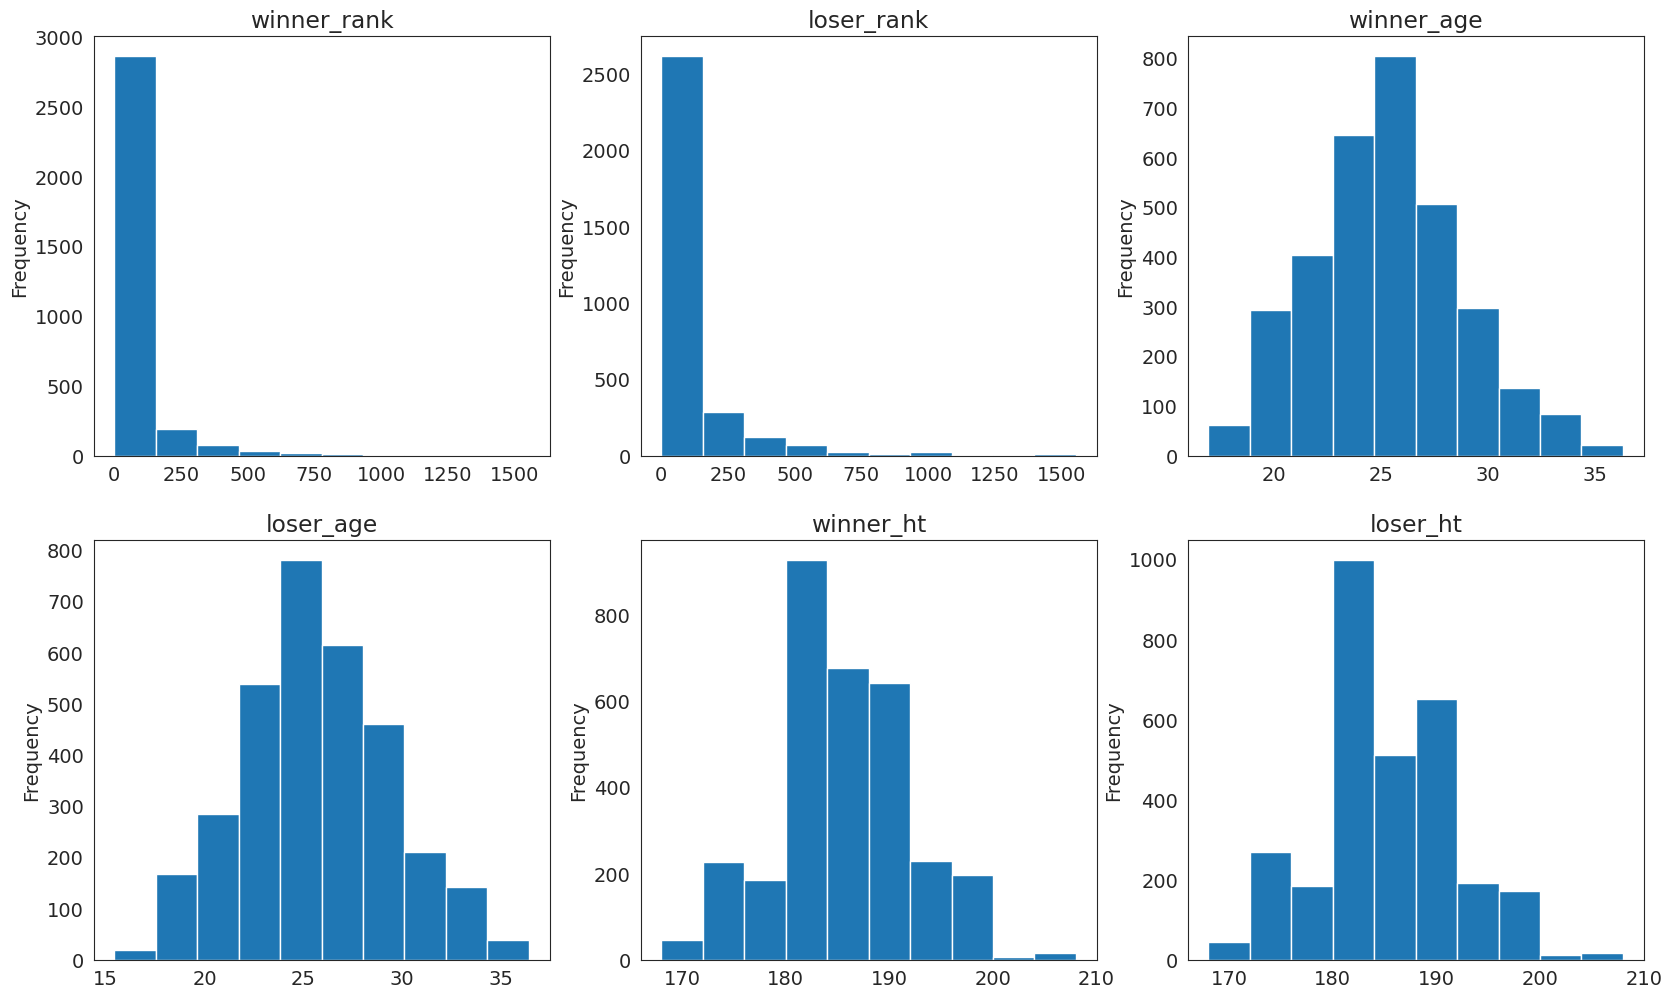

In [13]:
dimensions = ['winner_rank','loser_rank','winner_age','loser_age','winner_ht','loser_ht']

plt.figure(1, figsize=(20,12))

for i in range(1,7):
    plt.subplot(2,3,i)
    df[dimensions[i-1]].plot(kind='hist', title=dimensions[i-1])

**The Players who won the most matches are likely to win again**

Text(0.5, 1.0, '10 Top players')

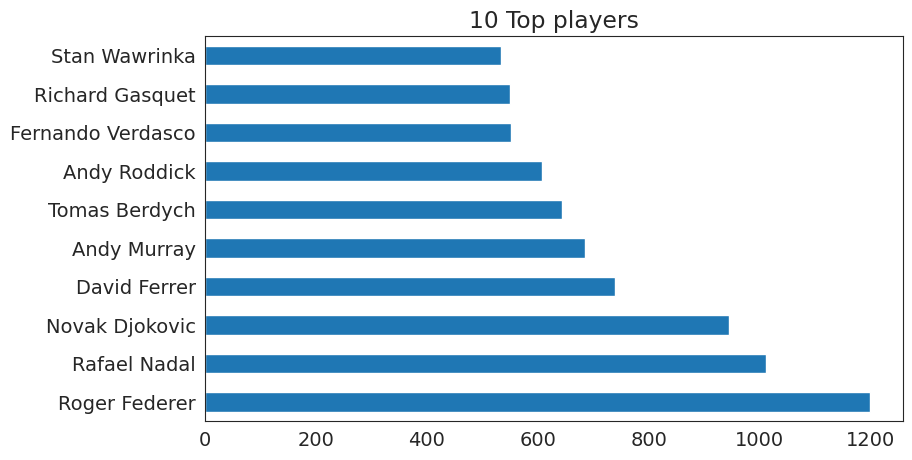

In [14]:
plt.figure(figsize=(9,5))
tennis_df['winner_name'].value_counts()[:10].plot(kind='barh')
plt.title('10 Top players')

In [15]:
tennis_df.tourney_level.unique()

array(['A', 'G', 'D', 'M', 'F'], dtype=object)

In [16]:
tennis_df.loser_ioc.unique()

array(['JPN', 'RUS', 'SVK', 'FRA', 'USA', 'AUS', 'COL', 'CAN', 'FIN',
       'ESP', 'GER', 'BEL', 'UZB', 'UKR', 'AUT', 'CYP', 'BUL', 'CZE',
       'SLO', 'TPE', 'ITA', 'IND', 'POR', 'NED', 'ISR', 'CRO', 'SUI',
       'ROU', 'QAT', 'POL', 'EGY', 'SRB', 'NZL', 'BRA', 'RSA', 'ARG',
       'KAZ', 'LUX', 'CHN', 'GBR', 'LTU', 'INA', 'DEN', 'DOM', 'URU',
       'BIH', 'BAR', 'EST', 'IRL', 'KUW', 'THA', 'HUN', 'MDA', 'PUR',
       'MEX', 'BLR', 'MON', 'LIB', 'HAI', 'SYR', 'PHI', 'BEN', 'SRI',
       'PAK', 'TUN', 'GUA', 'VEN', 'CHI', 'LAT', 'ECU', 'KOR', 'SWE',
       'ESA', 'PER', 'MAR', 'GEO', 'TUR', 'GRE', 'BOL', 'NOR', 'LBN',
       'PAR', 'HKG', 'ALG', 'ZIM', 'ARM', 'CRC', 'AZE', 'UAE', 'GHA',
       'MAS', 'BAH', 'AHO', 'CUB', 'TRI', 'CIV', 'IRI', 'MAD', 'VIE',
       'JAM', 'COK', 'SOL', 'MHL', 'SAM', 'VAN', 'MKD', 'NGR', 'KEN',
       'UNK', 'OMA', 'MNE', 'TOG', 'TJK', 'AND'], dtype=object)

In [17]:
tennis_df.describe()

,draw_size,tourney_date,match_num,winner_id,winner_seed,winner_ht,winner_age,loser_id,loser_seed,loser_ht,loser_age,best_of,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
count,59789.000000,5.978900e+04,59789.000000,59789.000000,24962.000000,57587.000000,59787.000000,59789.000000,13639.000000,55328.000000,59789.000000,59789.000000,52911.00000,54233.000000,54233.000000,54233.000000,54233.000000,54233.000000,54233.000000,54233.000000,54233.000000,54233.000000,54233.000000,54233.000000,54233.000000,54233.000000,54233.000000,54233.000000,54233.000000,54233.00000,54233.000000,59308.000000,59308.000000,58540.000000,58540.000000
mean,54.200003,2.010032e+07,78.938149,105451.107461,7.384945,186.017037,26.341356,105724.055512,8.917589,185.553407,26.392426,3.468247,105.88698,6.932845,2.632843,77.809267,47.804676,36.192503,16.651854,12.495012,3.448601,5.014770,5.101101,3.358951,80.902255,48.408386,32.287242,14.973264,12.288238,4.76352,8.612284,80.362514,1581.428408,119.428920,943.287444
std,39.609851,5.630658e+04,126.450002,8896.487473,6.831152,7.365465,3.890618,9740.529288,7.353932,7.106144,4.008070,0.846906,41.01938,5.559763,2.268119,29.233527,18.923762,13.580526,6.993044,4.234599,3.063981,4.019125,4.888559,2.507671,29.266643,19.259278,14.404988,7.229910,4.235843,3.26359,4.137179,141.684111,2028.033938,189.772836,1102.378554
min,4.000000,2.001010e+07,1.000000,100644.000000,1.000000,1.700000,14.926762,100644.000000,1.000000,1.700000,14.513347,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,32.000000,2.005070e+07,10.000000,103507.000000,3.000000,183.000000,23.446954,103454.000000,4.000000,180.000000,23.457906,3.000000,76.00000,3.000000,1.000000,56.000000,34.000000,27.000000,12.000000,9.000000,1.000000,2.000000,2.000000,2.000000,59.000000,35.000000,22.000000,10.000000,9.000000,2.00000,6.000000,18.000000,561.000000,36.000000,419.000000
50%,32.000000,2.010032e+07,25.000000,104259.000000,5.000000,185.000000,26.201232,104259.000000,7.000000,185.000000,26.294319,3.000000,98.00000,6.000000,2.000000,73.000000,44.000000,34.000000,16.000000,11.000000,3.000000,4.000000,4.000000,3.000000,76.000000,45.000000,30.000000,14.000000,11.000000,4.00000,8.000000,44.000000,920.000000,68.000000,683.000000
75%,64.000000,2.015041e+07,87.000000,104926.000000,9.000000,190.000000,29.033539,105064.000000,12.000000,190.000000,29.188227,3.000000,128.00000,9.000000,4.000000,94.000000,58.000000,43.000000,20.000000,15.000000,5.000000,7.000000,7.000000,5.000000,97.000000,59.000000,40.000000,19.000000,15.000000,7.00000,11.000000,85.000000,1685.000000,114.000000,1075.000000
max,128.000000,2.020112e+07,1701.000000,210013.000000,35.000000,211.000000,40.892539,210013.000000,35.000000,211.000000,46.036961,5.000000,1146.00000,113.000000,26.000000,491.000000,361.000000,292.000000,82.000000,90.000000,24.000000,30.000000,103.000000,23.000000,489.000000,328.000000,284.000000,101.000000,91.000000,27.00000,35.000000,2101.000000,16950.000000,2159.000000,16950.000000


# Let's Analyse Top 5 Countries and their Top 5 Players and Last 5 Players: For WINNER and LOSER

**WINNER**

In [18]:
winner = tennis_df.winner_ioc.value_counts()
winner.head()

ESP    7549
FRA    5606
USA    4852
ARG    3978
GER    3296
Name: winner_ioc, dtype: int64

[Text(0.5, 0, 'Country'), Text(0, 0.5, 'Wins')]

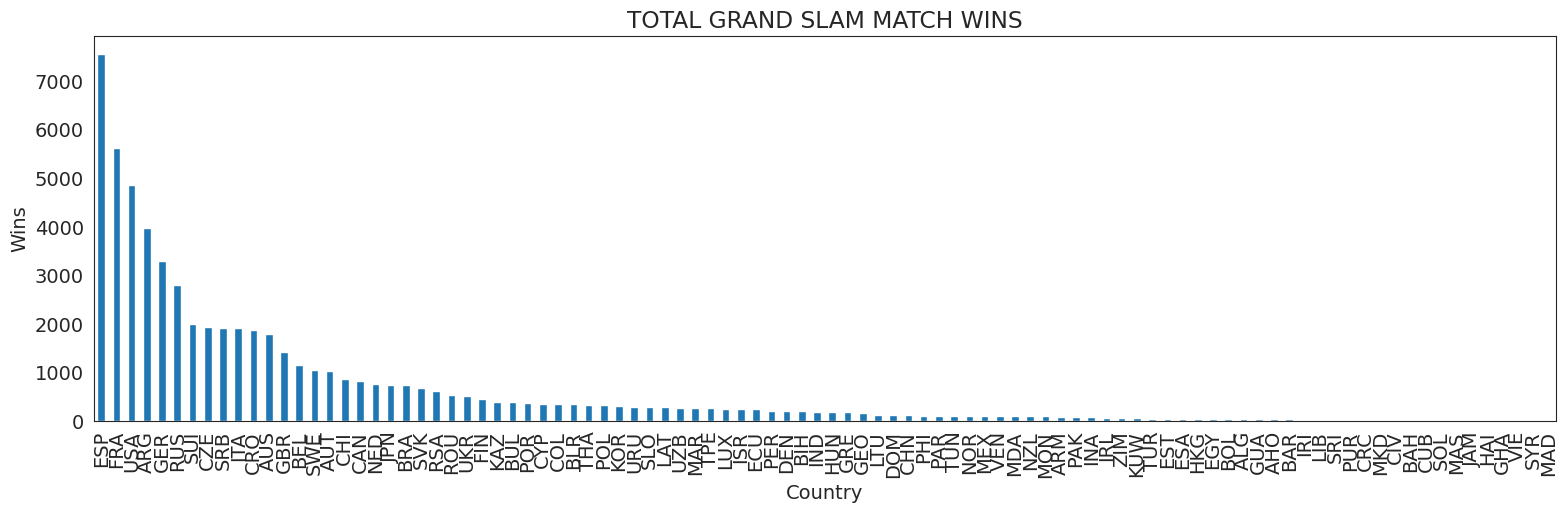

In [19]:
plt.figure(figsize=(200, 5))

plt.subplot(1,9,1)
plt1 = tennis_df.winner_ioc.value_counts()[:-10].plot(kind='bar')
plt.title('TOTAL GRAND SLAM MATCH WINS')
plt1.set(xlabel = 'Country', ylabel='Wins')

**Top 5 Countries with the most tennis wins are**:
* Spain
* France
* USA
* Argentina
* Switzerland

Spain

In [20]:
esp = tennis_df[['winner_ioc','tourney_level','winner_name']]

In [21]:
esp = esp[(esp.tourney_level == 'G') & (esp.winner_ioc == 'ESP')]

In [22]:
esp.head()

,winner_ioc,tourney_level,winner_name
141,ESP,G,Feliciano Lopez
150,ESP,G,Fernando Verdasco
152,ESP,G,Roberto Bautista Agut
155,ESP,G,David Ferrer
163,ESP,G,Nicolas Almagro


In [23]:
esp_winnername = esp.winner_name.value_counts()

In [24]:
esp_winnername.head()

Rafael Nadal         283
David Ferrer         146
Fernando Verdasco    113
Tommy Robredo        107
Feliciano Lopez       96
Name: winner_name, dtype: int64

France

In [25]:
fra = tennis_df[['winner_ioc','tourney_level','winner_name','round']]

In [26]:
fra = fra[(fra.tourney_level == 'G') & (fra.winner_ioc == 'FRA')]

In [27]:
fra.head()

,winner_ioc,tourney_level,winner_name,round
153,FRA,G,Guillaume Rufin,R128
167,FRA,G,Julien Benneteau,R128
168,FRA,G,Edouard Roger Vasselin,R128
173,FRA,G,Jeremy Chardy,R128
179,FRA,G,Gilles Simon,R128


In [28]:
fra_winnername = fra.winner_name.value_counts()

In [29]:
fra_winnername

Jo-Wilfried Tsonga        122
Gael Monfils              110
Richard Gasquet           107
Gilles Simon               89
Sebastien Grosjean         65
Jeremy Chardy              52
Julien Benneteau           47
Arnaud Clement             45
Paul Henri Mathieu         44
Benoit Paire               42
Fabrice Santoro            36
Michael Llodra             32
Adrian Mannarino           31
Nicolas Mahut              31
Lucas Pouille              30
Florent Serra              21
Nicolas Escude             18
Pierre Hugues Herbert      16
Marc Gicquel               15
Edouard Roger Vasselin     15
Stephane Robert            11
Antony Dupuis               7
Guillaume Rufin             7
Kenny De Schepper           7
Nicolas Devilder            6
Corentin Moutet             6
Olivier Patience            6
Nicolas Coutelot            5
Olivier Mutis               5
Cyril Saulnier              5
Gregoire Barrere            5
Gregory Carraz              5
Ugo Humbert                 5
Jerome Gol

USA

In [30]:
usa = tennis_df[['winner_ioc','tourney_level','winner_name']]

In [31]:
usa = usa[(usa.tourney_level == 'G') & (usa.winner_ioc == 'USA')]

In [32]:
usa.head()

,winner_ioc,tourney_level,winner_name
140,USA,G,Ryan Harrison
143,USA,G,Sam Querrey
144,USA,G,Brian Baker
156,USA,G,Tim Smyczek
177,USA,G,Rajeev Ram


In [33]:
usa_winnername = usa.winner_name.value_counts()

In [34]:
usa_winnername.head()

Andy Roddick    131
John Isner       79
Andre Agassi     73
Sam Querrey      60
James Blake      60
Name: winner_name, dtype: int64

Argentina

In [35]:
arg = tennis_df[['winner_ioc','tourney_level','winner_name']]

In [36]:
arg = arg[(arg.tourney_level == 'G') & (arg.winner_ioc == 'ARG')]

In [37]:
arg.head()

,winner_ioc,tourney_level,winner_name
161,ARG,G,Carlos Berlocq
171,ARG,G,Juan Martin del Potro
219,ARG,G,Juan Martin del Potro
1440,ARG,G,Guido Pella
1452,ARG,G,Federico Delbonis


In [38]:
arg_winnername = arg.winner_name.value_counts()

In [39]:
arg_winnername.head()

Juan Martin del Potro    97
David Nalbandian         86
Juan Ignacio Chela       45
Guillermo Coria          39
Diego Schwartzman        37
Name: winner_name, dtype: int64

Switzerland

In [40]:
sui = tennis_df[['winner_ioc','tourney_level','winner_name']]

In [41]:
sui = sui[(sui.tourney_level == 'G') & (sui.winner_ioc == 'SUI')]

In [42]:
sui.head()

,winner_ioc,tourney_level,winner_name
146,SUI,G,Stan Wawrinka
202,SUI,G,Roger Federer
206,SUI,G,Stan Wawrinka
234,SUI,G,Roger Federer
236,SUI,G,Stan Wawrinka


In [43]:
sui_winnername = sui.winner_name.value_counts()

In [44]:
sui_winnername

Roger Federer        359
Stan Wawrinka        152
Michel Kratochvil      8
Marco Chiudinelli      8
Henri Laaksonen        3
George Bastl           3
Ivo Heuberger          3
Marc Rosset            2
Michael Lammer         1
Name: winner_name, dtype: int64

**Loser**

In [45]:
loser = tennis_df.loser_ioc.value_counts()
loser.head()

ESP    6310
FRA    5533
USA    4904
GER    3795
ARG    3573
Name: loser_ioc, dtype: int64

[Text(0.5, 0, 'Country'), Text(0, 0.5, 'Lost')]

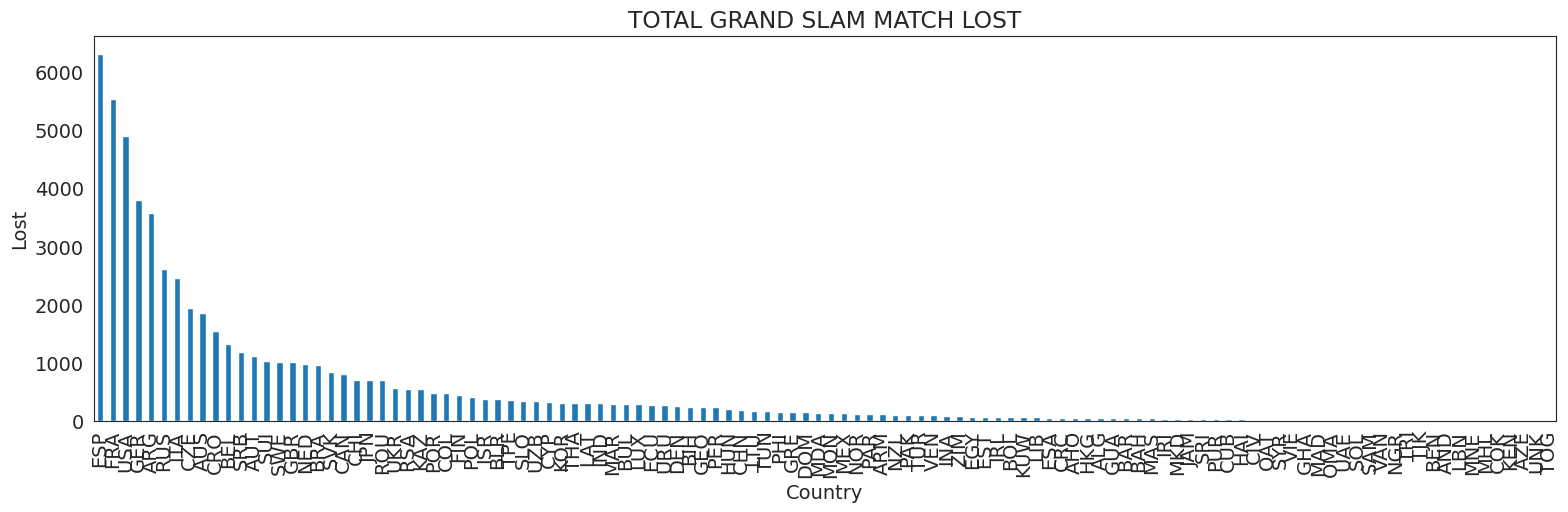

In [46]:
plt.figure(figsize=(200, 5))

plt.subplot(1,9,1)
plt1 = tennis_df.loser_ioc.value_counts().plot(kind='bar')
plt.title('TOTAL GRAND SLAM MATCH LOST')
plt1.set(xlabel = 'Country', ylabel='Lost')

**Top 5 Countries with the most tennis wins are**:

* France
* Spain
* USA
* Germany
* Australia

France

In [47]:
fra = tennis_df[['loser_ioc','tourney_level','loser_name']]

In [48]:
fra = fra[(fra.tourney_level == 'G') & (fra.loser_ioc == 'FRA')]
fra.head()

,loser_ioc,tourney_level,loser_name
139,FRA,G,Paul Henri Mathieu
171,FRA,G,Adrian Mannarino
187,FRA,G,Michael Llodra
193,FRA,G,Josselin Ouanna
202,FRA,G,Benoit Paire


In [49]:
fra_loosername = fra.loser_name.value_counts()
fra_loosername.head()

Richard Gasquet       61
Julien Benneteau      57
Gilles Simon          57
Gael Monfils          53
Paul Henri Mathieu    51
Name: loser_name, dtype: int64

Spain

In [50]:
spa = tennis_df[['loser_ioc','tourney_level','loser_name']]

In [51]:
spa = spa[(spa.tourney_level == 'G') & (spa.loser_ioc == 'ESP')]
spa.head()

,loser_ioc,tourney_level,loser_name
141,ESP,G,Arnau Brugues Davi
143,ESP,G,Daniel Munoz de la Nava
149,ESP,G,Pablo Andujar
158,ESP,G,Albert Ramos
173,ESP,G,Adrian Menendez Maceiras


In [52]:
spa_loosername = spa.loser_name.value_counts()
spa_loosername.head()

Feliciano Lopez           75
Fernando Verdasco         67
David Ferrer              63
Tommy Robredo             58
Guillermo Garcia Lopez    57
Name: loser_name, dtype: int64

USA

In [53]:
usa = tennis_df[['loser_ioc','tourney_level','loser_name']]

In [54]:
usa = usa[(usa.tourney_level == 'G') & (usa.loser_ioc == 'FRA')]
usa.head()

,loser_ioc,tourney_level,loser_name
139,FRA,G,Paul Henri Mathieu
171,FRA,G,Adrian Mannarino
187,FRA,G,Michael Llodra
193,FRA,G,Josselin Ouanna
202,FRA,G,Benoit Paire


In [55]:
usa_loosername = usa.loser_name.value_counts()
usa_loosername.head()

Richard Gasquet       61
Julien Benneteau      57
Gilles Simon          57
Gael Monfils          53
Paul Henri Mathieu    51
Name: loser_name, dtype: int64

Germany

In [56]:
ger = tennis_df[['loser_ioc','tourney_level','loser_name']]

In [57]:
ger = ger[(ger.tourney_level == 'G') & (ger.loser_ioc == 'GER')]
ger.head()

,loser_ioc,tourney_level,loser_name
146,GER,G,Cedrik Marcel Stebe
153,GER,G,Julian Reister
165,GER,G,Bjorn Phau
191,GER,G,Tommy Haas
206,GER,G,Tobias Kamke


In [58]:
ger_loosername = ger.loser_name.value_counts()

In [59]:
ger_loosername.head()

Philipp Kohlschreiber    64
Florian Mayer            47
Tommy Haas               45
Rainer Schuettler        41
Benjamin Becker          36
Name: loser_name, dtype: int64

Australia

In [60]:
arg = tennis_df[['loser_ioc','tourney_level','loser_name']]

In [61]:
arg = arg[(arg.tourney_level == 'G') & (arg.loser_ioc == 'ARG')]
arg.head()

,loser_ioc,tourney_level,loser_name
147,ARG,G,Juan Monaco
175,ARG,G,Horacio Zeballos
197,ARG,G,Guido Pella
200,ARG,G,Leonardo Mayer
214,ARG,G,Carlos Berlocq


In [62]:
arg_losername = arg.loser_name.value_counts()
arg_losername.head()

Juan Monaco              44
Leonardo Mayer           39
Juan Ignacio Chela       39
Juan Martin del Potro    36
David Nalbandian         36
Name: loser_name, dtype: int64

# Statistical Analysis

In [63]:
tennis_df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2013-339,Brisbane,Hard,28,A,20121230,1,105357,NaN,Q,John Millman,R,183.0,AUS,23.548255,105147,NaN,NaN,Tatsuma Ito,R,180.0,JPN,24.621492,6-4 6-1,3,R32,86.0,7.0,6.0,69.0,44.0,33.0,11.0,9.0,3.0,4.0,2.0,5.0,53.0,26.0,19.0,8.0,8.0,3.0,7.0,199.0,239.0,79.0,655.0
1,2013-339,Brisbane,Hard,28,A,20121230,2,103720,NaN,WC,Lleyton Hewitt,R,180.0,AUS,31.849418,103857,NaN,LL,Igor Kunitsyn,R,180.0,RUS,31.252567,6-3 4-6 6-2,3,R32,124.0,8.0,2.0,69.0,34.0,29.0,21.0,13.0,1.0,2.0,7.0,5.0,99.0,53.0,37.0,19.0,14.0,6.0,10.0,83.0,625.0,162.0,339.0
2,2013-339,Brisbane,Hard,28,A,20121230,3,104797,NaN,NaN,Denis Istomin,R,188.0,UZB,26.316222,105373,8.0,NaN,Martin Klizan,L,190.0,SVK,23.474333,6-1 6-2,3,R32,70.0,6.0,2.0,53.0,33.0,28.0,8.0,8.0,2.0,2.0,3.0,3.0,57.0,31.0,19.0,9.0,7.0,9.0,13.0,43.0,897.0,30.0,1175.0
3,2013-339,Brisbane,Hard,28,A,20121230,4,103813,NaN,NaN,Jarkko Nieminen,L,185.0,FIN,31.441478,103898,NaN,NaN,Julien Benneteau,R,185.0,FRA,31.030801,6-3 2-6 6-1,3,R32,104.0,4.0,1.0,94.0,63.0,40.0,15.0,12.0,8.0,11.0,6.0,6.0,70.0,48.0,29.0,7.0,12.0,1.0,6.0,41.0,927.0,35.0,1075.0
4,2013-339,Brisbane,Hard,28,A,20121230,5,103990,NaN,NaN,Tommy Robredo,R,180.0,ESP,30.669405,105992,NaN,Q,Ryan Harrison,R,183.0,USA,20.651608,6-4 7-6(4),3,R32,96.0,6.0,0.0,64.0,50.0,43.0,8.0,11.0,1.0,1.0,4.0,1.0,68.0,39.0,26.0,20.0,11.0,0.0,1.0,114.0,495.0,69.0,710.0


In [64]:
tennis_df.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

In [65]:
tennis_df.groupby(["tourney_level"]).mean() 

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,draw_size,tourney_date,match_num,winner_id,winner_seed,winner_ht,winner_age,loser_id,loser_seed,loser_ht,loser_age,best_of,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
tourney_level,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,34.870992,2.009911e+07,78.026293,105339.711635,4.624614,185.980093,26.463467,105388.799607,5.493593,185.419288,26.555063,3.002703,95.185684,6.275694,2.403727,70.421177,43.209375,32.731243,15.098078,11.266704,3.136711,4.534434,4.590612,3.055524,72.912996,43.621532,29.086568,13.493997,11.083924,4.282537,7.764682,69.365226,1250.670273,104.244668,820.584916
D,4.000000,2.009666e+07,2.922656,106725.124059,NaN,184.553553,25.011457,108458.010438,NaN,184.570219,24.495962,4.327515,123.219114,7.435780,3.057339,87.967890,54.933486,41.287844,18.396789,14.387615,3.832569,5.691514,5.097477,3.844037,92.996560,56.967890,37.193807,16.233945,13.903670,5.709862,10.369266,299.545944,752.040468,445.359425,390.561455
F,8.345821,2.011624e+07,194.708934,110493.394813,3.593407,186.530259,25.639767,109640.582133,5.088889,186.520710,25.980192,3.034582,104.151899,6.342183,2.129794,72.501475,44.345133,34.085546,15.719764,11.705015,3.020649,4.353982,5.327434,2.737463,74.784661,44.908555,30.610619,13.817109,11.469027,4.365782,7.752212,10.299712,4960.853026,19.861671,3801.383285
G,128.000000,2.010433e+07,115.157779,105321.854281,12.897719,186.307584,26.605083,105644.078840,16.944583,185.577927,26.667305,5.000000,146.835931,10.075400,3.652100,108.690600,67.174500,50.969300,22.981500,17.619700,4.744600,6.971400,7.303000,4.664500,114.140100,68.833300,45.985800,20.962500,17.341400,6.752400,12.078100,48.373280,2181.497308,88.073368,1003.454981
M,72.196203,2.010166e+07,85.329004,105063.095195,8.955284,186.417870,26.467736,105213.630393,11.718296,186.173328,26.680676,3.006540,98.536292,5.963767,2.354515,70.603090,43.113482,32.493379,15.313684,11.286463,3.161394,4.601802,4.578628,3.035865,73.176292,43.199743,28.811017,13.773680,11.097664,4.292992,7.816811,36.960483,2311.634448,55.873319,1397.593057


In [66]:
tennis_df.groupby(["tourney_name"]).mean().head()

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,draw_size,tourney_date,match_num,winner_id,winner_seed,winner_ht,winner_age,loser_id,loser_seed,loser_ht,loser_age,best_of,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
tourney_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ATP Rio de Janeiro,32.000000,2.020022e+07,285.000000,119216.032258,3.090909,184.615385,25.549005,123872.451613,5.142857,183.760000,26.747919,3.000000,135.064516,4.161290,2.806452,86.935484,55.709677,39.000000,15.709677,13.000000,4.580645,7.161290,3.096774,3.225806,88.967742,57.129032,37.322581,14.516129,12.870968,5.451613,9.193548,90.225806,1218.129032,102.612903,923.129032
Acapulco,32.000000,2.010523e+07,83.250000,105545.893548,4.050167,185.162029,26.476523,105951.162903,4.657343,184.341216,26.623422,3.000000,99.050325,5.871753,2.469156,69.202922,42.472403,32.097403,14.581169,11.108766,3.136364,4.650974,4.056818,2.991883,71.910714,43.082792,28.147727,13.274351,10.939935,4.386364,8.008117,50.958065,1543.224194,91.603560,915.768608
Adelaide,32.000000,2.005768e+07,111.226148,105442.272085,3.936364,186.149466,25.036117,104854.950530,4.716418,185.186380,25.363750,3.000000,88.868327,6.341637,2.594306,68.459075,40.750890,31.249110,15.548043,11.042705,3.103203,4.366548,5.000000,3.291815,70.935943,41.879004,27.893238,13.252669,10.868327,4.092527,7.612100,69.263345,816.419929,93.971631,633.769504
Amersfoort,31.492958,2.005015e+07,15.746479,103481.962441,3.619565,183.164319,25.573043,103452.230047,4.680000,183.692308,25.750592,3.009390,93.259434,4.900943,2.268868,68.259434,41.863208,31.127358,14.433962,10.698113,3.339623,4.792453,3.169811,2.419811,70.094340,42.533019,26.806604,12.547170,10.551887,4.415094,8.207547,96.638498,653.093897,135.558685,480.159624
Amsterdam,32.000000,2.001072e+07,16.000000,102595.290323,4.000000,184.193548,26.419995,102863.258065,4.857143,185.032258,24.937493,3.064516,96.161290,4.322581,2.064516,74.612903,44.709677,32.870968,16.806452,11.935484,3.322581,5.161290,4.096774,2.709677,75.516129,45.387097,30.322581,13.709677,11.967742,3.967742,7.935484,118.774194,806.129032,129.096774,497.064516


**Winner Group**

In [67]:
winner = tennis_df[['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age','score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced','score',
       'winner_rank', 'winner_rank_points']]

In [68]:
winner.describe()

,draw_size,tourney_date,match_num,winner_id,winner_seed,winner_ht,winner_age,best_of,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,winner_rank,winner_rank_points
count,59789.000000,5.978900e+04,59789.000000,59789.000000,24962.000000,57587.000000,59787.000000,59789.000000,52911.00000,54233.000000,54233.000000,54233.000000,54233.000000,54233.000000,54233.000000,54233.000000,54233.000000,54233.000000,59308.000000,59308.000000
mean,54.200003,2.010032e+07,78.938149,105451.107461,7.384945,186.017037,26.341356,3.468247,105.88698,6.932845,2.632843,77.809267,47.804676,36.192503,16.651854,12.495012,3.448601,5.014770,80.362514,1581.428408
std,39.609851,5.630658e+04,126.450002,8896.487473,6.831152,7.365465,3.890618,0.846906,41.01938,5.559763,2.268119,29.233527,18.923762,13.580526,6.993044,4.234599,3.063981,4.019125,141.684111,2028.033938
min,4.000000,2.001010e+07,1.000000,100644.000000,1.000000,1.700000,14.926762,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,32.000000,2.005070e+07,10.000000,103507.000000,3.000000,183.000000,23.446954,3.000000,76.00000,3.000000,1.000000,56.000000,34.000000,27.000000,12.000000,9.000000,1.000000,2.000000,18.000000,561.000000
50%,32.000000,2.010032e+07,25.000000,104259.000000,5.000000,185.000000,26.201232,3.000000,98.00000,6.000000,2.000000,73.000000,44.000000,34.000000,16.000000,11.000000,3.000000,4.000000,44.000000,920.000000
75%,64.000000,2.015041e+07,87.000000,104926.000000,9.000000,190.000000,29.033539,3.000000,128.00000,9.000000,4.000000,94.000000,58.000000,43.000000,20.000000,15.000000,5.000000,7.000000,85.000000,1685.000000
max,128.000000,2.020112e+07,1701.000000,210013.000000,35.000000,211.000000,40.892539,5.000000,1146.00000,113.000000,26.000000,491.000000,361.000000,292.000000,82.000000,90.000000,24.000000,30.000000,2101.000000,16950.000000


In [69]:
winner.groupby(["winner_ioc"]).mean().head()

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,draw_size,tourney_date,match_num,winner_id,winner_seed,winner_ht,winner_age,best_of,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,winner_rank,winner_rank_points
winner_ioc,,,,,,,,,,,,,,,,,,,,
AHO,4.000000,2.006768e+07,2.724138,105122.793103,NaN,183.000000,22.972645,4.655172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,867.727273,55.545455
ALG,10.344828,2.010218e+07,12.862069,104086.310345,NaN,185.000000,28.209965,4.034483,74.250000,1.750000,1.625000,58.125000,35.750000,26.750000,12.000000,9.500000,2.750000,4.000000,465.103448,83.724138
AND,4.000000,2.003061e+07,3.666667,106969.333333,NaN,NaN,21.387178,4.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,674.000000,20.000000
ARG,55.326295,2.008885e+07,77.205380,104192.751383,7.664049,184.586358,25.740748,3.347914,107.789892,4.609827,2.553600,75.004992,46.582764,34.144771,15.710720,11.977141,3.513925,5.310825,55.418406,1251.450591
ARM,60.455696,2.002707e+07,24.063291,102307.797468,9.333333,180.000000,29.660593,3.556962,106.051948,5.285714,3.311688,78.844156,48.103896,35.389610,16.662338,12.649351,3.454545,5.441558,75.038462,570.256410


In [70]:
print("Minimum age in Winner Group :", winner['winner_age'].min())
print("Maximum age in Winner Group :", winner['winner_age'].max())
print("Mean age in Winner Group :", winner['winner_age'].mean())
print("Mode age in Winner Group :", winner['winner_age'].mode())

Minimum age in Winner Group : 14.9267624914
Maximum age in Winner Group : 40.8925393566
Mean age in Winner Group : 26.341356167577533
Mode age in Winner Group : 0    27.356605
Name: winner_age, dtype: float64


In [71]:
winner['winner_age'].value_counts().unique()

array([41, 39, 38, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23,
       22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,
        5,  4,  3,  2,  1])

In [72]:
winner['winner_age'].value_counts().nunique()

39

In [73]:
winner.groupby(winner['tourney_level'])['winner_rank','winner_rank_points','winner_ht','winner_age'].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


winner_rank                                                   \
                    count        mean         std  min   25%    50%    75%   
tourney_level                                                                
A                 32536.0   69.365226   79.134746  1.0  25.0   52.0   88.0   
D                  5387.0  299.545944  341.052722  1.0  51.0  172.0  423.0   
F                   347.0   10.299712   17.811378  1.0   2.0    5.0    7.0   
G                 10030.0   48.373280   63.123702  1.0  10.0   29.0   67.0   
M                 11008.0   36.960483   47.482152  1.0   9.0   25.0   50.0   

                      winner_rank_points                                   \
                  max              count         mean          std    min   
tourney_level                                                               
A              1890.0            32536.0  1250.670273  1451.021851    1.0   
D              2101.0             5387.0   752.040468  1400.220673    1.0   
F                95.0              347.0  4960.853026  3304.414720  596.0   
G              1098.0            10030.0  2181.497308  2577.576108    5.0   
M              1034.0            11008.0  2311.634448  2588.403545    8.0   

                                                winner_ht              \
                  25%     50%      75%      max     count        mean   
tourney_level                                                           
A               543.0   827.0  1343.25  16790.0   32100.0  185.980093   
D                77.0   271.0   845.00  16580.0    4278.0  184.553553   
F              2330.0  3919.0  6970.00  15285.0     347.0  186.530259   
G               688.0  1230.0  2430.00  16950.0    9916.0  186.307584   
M               853.0  1345.0  2510.00  16550.0   10946.0  186.417870   

                                                            winner_age  \
                     std    min    25%    50%    75%    max      count   
tourney_level                                                            
A               6.855194  168.0  183.0  185.0  190.0  211.0    32556.0   
D              12.157661    1.7  180.0  185.0  190.0  211.0     5842.0   
F               5.661561  175.0  183.0  185.0  188.0  203.0      347.0   
G               6.784797  168.0  183.0  185.0  190.0  211.0    10033.0   
M               6.785971  168.0  183.0  185.0  190.0  211.0    11009.0   

                                                                     \
                    mean       std        min        25%        50%   
tourney_level                                                         
A              26.463467  3.854766  15.904175  23.603012  26.324435   
D              25.011457  3.976889  14.926762  22.094456  24.672142   
F              25.639767  4.110722  18.217659  21.787817  25.275838   
G              26.605083  3.884544  16.246407  23.679671  26.453114   
M              26.467736  3.809667  15.824778  23.641342  26.354552   

                                     
                     75%        max  
tourney_level                        
A              29.120465  40.624230  
D              27.780972  40.087611  
F              28.175222  38.258727  
G              29.295003  40.892539  
M              29.075975  40.010951

In [74]:
winner.groupby(winner['winner_ioc'])['winner_rank','winner_rank_points','winner_ht','winner_age'].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


winner_rank                                                    \
                 count         mean         std     min      25%     50%   
winner_ioc                                                                 
AHO               22.0   867.727273  530.549417   248.0   263.25  1121.0   
ALG               29.0   465.103448  237.871566   262.0   313.00   394.0   
AND                1.0   674.000000         NaN   674.0   674.00   674.0   
ARG             3977.0    55.418406   64.048464     3.0    19.00    42.0   
ARM               78.0    75.038462   23.992121    38.0    54.00    73.5   
AUS             1781.0    72.692308   83.667243     1.0    18.00    52.0   
AUT             1020.0    68.925490   95.252479     3.0    15.00    49.0   
BAH               10.0   978.000000  349.693199   358.0   941.00  1006.0   
BAR               26.0   307.576923  188.430395   114.0   145.50   245.0   
BEL             1154.0    66.453206   53.657695     7.0    31.25    58.0   
BEN                2.0  1392.000000    0.000000  1392.0  1392.00  1392.0   
BIH              196.0   136.397959  148.949397    23.0    66.75    89.0   
BLR              334.0   113.188623  144.255041    22.0    38.00    53.0   
BOL               29.0   313.241379  313.018445    83.0    94.00   113.0   
BRA              740.0    83.302703  103.465540     1.0    35.00    70.0   
BUL              375.0    92.096000  178.055544     3.0    13.00    22.0   
CAN              826.0    74.283293  124.268291     3.0    14.00    31.0   
CHI              863.0    58.060255   76.062245     5.0    16.00    31.0   
CHN              108.0   452.583333  251.222846   152.0   220.75   402.5   
CIV                9.0   821.111111  294.721243   485.0   486.00   765.0   
COL              345.0   135.455072  163.098215    30.0    61.00    80.0   
CRC               19.0   145.947368   35.220691   103.0   126.50   135.0   
CRO             1866.0    48.511254   70.869272     3.0    14.00    29.0   
CUB                4.0  1180.250000  146.103559  1095.0  1096.50  1114.0   
CYP              352.0    55.309659   94.912094     8.0    22.00    40.5   
CZE             1934.0    55.190279   71.831123     4.0    14.00    35.0   
DEN              189.0   245.000000  290.506180    52.0    85.00   109.0   
DOM              102.0   388.990196  446.059857    43.0    76.00   168.0   
ECU              232.0   172.064655  217.092316    19.0    36.00    83.0   
EGY               37.0   501.729730  272.691691   131.0   284.00   468.0   
ESA               33.0   512.727273  397.385697   181.0   262.00   382.0   
ESP             7548.0    41.842077   57.358842     1.0    11.00    28.0   
EST               38.0   440.315789  407.093661    77.0   122.00   268.0   
FIN              452.0    91.132743  168.914455    13.0    30.00    42.0   
FRA             5605.0    55.788403   58.153945     4.0    19.00    42.0   
GBR             1416.0    50.480226   98.523623     1.0     4.00    11.0   
GEO              156.0   110.070513  160.752910    16.0    34.00    71.0   
GER             3291.0    72.467335   78.123733     2.0    28.00    52.0   
GHA                4.0   679.500000  186.219405   426.0   630.75   709.0   
GRE              176.0   123.477273  246.093338     5.0     7.00    15.0   
GUA               22.0   841.272727  313.641163   422.0   516.75   973.5   
GUM                0.0          NaN         NaN     NaN      NaN     NaN   
HAI                4.0   774.000000  387.851346   513.0   513.00   624.5   
HKG               12.0  1234.083333  216.260558   911.0  1021.00  1261.0   
HUN              182.0   247.560440  272.968831    35.0    66.00   122.5   
INA               57.0   791.315789  401.831528   258.0   529.00   668.0   
IND              179.0   264.050279  211.165446    65.0   132.00   202.0   
IRI               15.0  1310.000000  368.319931   900.0  1052.00  1247.0   
IRL               49.0   508.836735  304.086977   133.0   278.00   376.0   
ISR              249.0   139.907631  139.990738    29.0    

**Looser Group**

In [75]:
looser = tennis_df[['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level','tourney_date', 'match_num','loser_id', 'loser_seed', 
                    'loser_entry', 'loser_name', 'loser_hand','loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round','minutes','score', 
       'l_ace', 'l_df', 'l_svpt','l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'loser_rank', 'loser_rank_points']]

In [76]:
looser.describe()

,draw_size,tourney_date,match_num,loser_id,loser_seed,loser_ht,loser_age,best_of,minutes,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,loser_rank,loser_rank_points
count,59789.000000,5.978900e+04,59789.000000,59789.000000,13639.000000,55328.000000,59789.000000,59789.000000,52911.00000,54233.000000,54233.000000,54233.000000,54233.000000,54233.000000,54233.000000,54233.000000,54233.00000,54233.000000,58540.000000,58540.000000
mean,54.200003,2.010032e+07,78.938149,105724.055512,8.917589,185.553407,26.392426,3.468247,105.88698,5.101101,3.358951,80.902255,48.408386,32.287242,14.973264,12.288238,4.76352,8.612284,119.428920,943.287444
std,39.609851,5.630658e+04,126.450002,9740.529288,7.353932,7.106144,4.008070,0.846906,41.01938,4.888559,2.507671,29.266643,19.259278,14.404988,7.229910,4.235843,3.26359,4.137179,189.772836,1102.378554
min,4.000000,2.001010e+07,1.000000,100644.000000,1.000000,1.700000,14.513347,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000
25%,32.000000,2.005070e+07,10.000000,103454.000000,4.000000,180.000000,23.457906,3.000000,76.00000,2.000000,2.000000,59.000000,35.000000,22.000000,10.000000,9.000000,2.00000,6.000000,36.000000,419.000000
50%,32.000000,2.010032e+07,25.000000,104259.000000,7.000000,185.000000,26.294319,3.000000,98.00000,4.000000,3.000000,76.000000,45.000000,30.000000,14.000000,11.000000,4.00000,8.000000,68.000000,683.000000
75%,64.000000,2.015041e+07,87.000000,105064.000000,12.000000,190.000000,29.188227,3.000000,128.00000,7.000000,5.000000,97.000000,59.000000,40.000000,19.000000,15.000000,7.00000,11.000000,114.000000,1075.000000
max,128.000000,2.020112e+07,1701.000000,210013.000000,35.000000,211.000000,46.036961,5.000000,1146.00000,103.000000,23.000000,489.000000,328.000000,284.000000,101.000000,91.000000,27.00000,35.000000,2159.000000,16950.000000


In [77]:
looser.groupby(["loser_ioc"]).mean().head()

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,draw_size,tourney_date,match_num,loser_id,loser_seed,loser_ht,loser_age,best_of,minutes,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,loser_rank,loser_rank_points
loser_ioc,,,,,,,,,,,,,,,,,,,,
AHO,4.000000,2.005938e+07,3.156863,106721.333333,NaN,183.000000,23.823919,4.215686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1335.111111,2.888889
ALG,16.583333,2.008742e+07,18.375000,104307.479167,NaN,185.000000,28.620066,3.958333,93.428571,2.000000,3.928571,73.071429,40.000000,24.857143,14.000000,11.214286,4.500000,9.071429,488.722222,110.750000
AND,4.000000,2.003053e+07,2.600000,105348.200000,NaN,NaN,23.108008,4.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,941.000000,12.400000
ARG,57.889729,2.009425e+07,81.389309,104300.136020,8.992048,184.046001,26.181518,3.390708,110.387332,3.640981,3.269553,80.599423,49.235498,31.675036,14.543434,12.202597,4.910534,9.012121,70.941968,970.684609
ARM,52.631579,2.002829e+07,26.403509,102766.561404,10.600000,180.000000,29.285013,3.438596,96.180000,3.400000,3.290000,76.460000,46.400000,29.640000,13.540000,11.700000,4.460000,8.620000,79.640777,569.446602


In [78]:
looser['loser_rank_points'].mean()

943.2874444824052

In [79]:
print("Minimum age in looser Group :", looser['loser_age'].min())
print("Maximum age in looser Group :", looser['loser_age'].max())
print("Mean age in looser Group :", looser['loser_age'].mean())
print("Mode age in looser Group :", looser['loser_age'].mode())

Minimum age in looser Group : 14.5133470226
Maximum age in looser Group : 46.0369609856
Mean age in looser Group : 26.39242627927822
Mode age in looser Group : 0    26.652977
Name: loser_age, dtype: float64


In [80]:
looser['loser_age'].value_counts().unique()

array([28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12,
       11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [81]:
looser.groupby(looser['tourney_level'])['loser_rank','loser_rank_points','loser_ht','loser_age'].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


loser_rank                                                    \
                   count        mean         std  min    25%    50%    75%   
tourney_level                                                                
A                32444.0  104.244668  128.875289  1.0   43.0   73.0  114.0   
D                 4727.0  445.359425  424.429488  1.0  106.0  305.0  675.0   
F                  347.0   19.861671   64.769653  1.0    4.0    6.0    9.0   
G                10018.0   88.073368   94.201395  1.0   36.0   70.0  107.0   
M                11004.0   55.873319   74.036162  1.0   21.0   40.0   66.0   

                      loser_rank_points                                  \
                  max             count         mean          std   min   
tourney_level                                                             
A              2159.0           32444.0   820.584916   809.264742   1.0   
D              2147.0            4727.0   390.561455   704.607428   1.0   
F               622.0             347.0  3801.383285  2531.998079  45.0   
G              1415.0           10018.0  1003.454981  1207.776395   2.0   
M              1517.0           11004.0  1397.593057  1465.792844   2.0   

                                               loser_ht              \
                  25%     50%     75%      max    count        mean   
tourney_level                                                         
A               416.0   639.0   960.0  16790.0  31284.0  185.419288   
D                27.0   131.0   478.5  14720.0   3153.0  184.570219   
F              2192.5  3330.0  4620.0  15285.0    338.0  186.520710   
G               452.0   681.0  1081.5  16950.0   9695.0  185.577927   
M               685.0   990.0  1515.0  16550.0  10858.0  186.173328   

                                                            loser_age  \
                     std    min    25%    50%    75%    max     count   
tourney_level                                                           
A               6.753332  168.0  180.0  185.0  190.0  211.0   32556.0   
D              10.950567    1.7  180.0  185.0  190.0  211.0    5844.0   
F               7.098785  170.0  183.0  185.0  190.0  206.0     347.0   
G               6.840417  168.0  180.0  185.0  190.0  211.0   10033.0   
M               6.856936  168.0  183.0  185.0  190.0  211.0   11009.0   

                                                                     \
                    mean       std        min        25%        50%   
tourney_level                                                         
A              26.555063  3.937257  15.430527  23.676249  26.442163   
D              24.495962  4.232817  14.513347  21.259411  24.221766   
F              25.980192  3.970795  18.217659  22.789870  25.883641   
G              26.667305  3.997365  15.939767  23.690623  26.537988   
M              26.680676  3.833252  15.622177  23.835729  26.603696   

                                     
                     75%        max  
tourney_level                        
A              29.289528  44.060233  
D              27.466119  46.036961  
F              28.372348  38.258727  
G              29.429158  41.505818  
M              29.368925  40.451745

In [82]:
looser.groupby(looser['loser_ioc'])['loser_rank','loser_rank_points','loser_ht','loser_age'].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


loser_rank                                                    \
               count         mean         std     min      25%     50%   
loser_ioc                                                                
AHO              9.0  1335.111111  186.973557  1090.0  1228.00  1328.0   
ALG             36.0   488.722222  315.902934   140.0   292.75   364.5   
AND              5.0   941.000000  366.567183   673.0   673.00   674.0   
ARG           3567.0    70.941968   71.763561     3.0    31.00    57.0   
ARM            103.0    79.640777   49.465546    38.0    53.00    73.0   
AUS           1838.0   114.773667  117.125465     1.0    47.00    82.0   
AUT           1114.0   106.996409  147.729136     3.0    38.00    75.0   
AZE              1.0   368.000000         NaN   368.0   368.00   368.0   
BAH             17.0   989.705882  436.847194   358.0   464.00  1059.0   
BAR             17.0   270.176471  202.186249   121.0   167.00   172.0   
BEL           1318.0    80.754932   63.508720     7.0    47.00    67.0   
BEN              0.0          NaN         NaN     NaN      NaN     NaN   
BIH            238.0   134.239496  133.229116    23.0    71.00    90.0   
BLR            368.0   142.820652  201.588002    18.0    38.75    60.5   
BOL             56.0   537.357143  468.637772    73.0    93.50   526.0   
BRA            953.0   113.316894  125.092900     1.0    60.00    88.0   
BUL            281.0   166.398577  248.210663     3.0    18.00    40.0   
CAN            797.0   127.421581  179.079172     3.0    25.00    88.0   
CHI            708.0    97.473164  148.870488     5.0    22.00    53.0   
CHN            184.0   428.076087  236.292041   154.0   230.75   357.0   
CIV             15.0   710.866667  237.283395   456.0   506.00   688.0   
COK              0.0          NaN         NaN     NaN      NaN     NaN   
COL            465.0   126.853763  144.676929    28.0    60.00    83.0   
CRC             42.0   261.238095  332.930653    97.0   121.25   138.5   
CRO           1534.0    82.280965  126.887359     3.0    21.25    41.0   
CUB              9.0  1231.888889  156.903190  1080.0  1095.00  1147.0   
CYP            296.0   113.618243  245.250974     8.0    27.00    44.0   
CZE           1931.0    81.249612   93.909034     4.0    27.00    65.0   
DEN            235.0   222.570213  264.841878    50.0    77.50   101.0   
DOM            113.0   342.840708  428.507701    46.0    77.00    99.0   
ECU            274.0   202.806569  244.227321    19.0    56.25    98.5   
EGY             69.0   491.579710  269.473856   131.0   291.00   430.0   
ESA             24.0   851.166667  545.488665   145.0   440.00   643.0   
ESP           6309.0    63.428911   78.354366     1.0    24.00    49.0   
EST             58.0   485.965517  478.076995    77.0   133.00   218.0   
FIN            440.0   149.463636  262.399535    13.0    35.00    50.0   
FRA           5530.0    76.712477   88.404708     4.0    32.00    55.0   
GBR            998.0   119.893788  153.581942     1.0    19.00    58.5   
GEO            223.0   198.488789  329.461913    16.0    51.00    84.0   
GER           3780.0    97.269312  115.606339     2.0    40.00    76.0   
GHA              7.0   792.857143  234.838546   549.0   621.00   699.0   
GRE            138.0   251.840580  338.535904     5.0    11.25   116.5   
GUA             25.0   997.400000  359.117553   429.0   743.00   986.0   
HAI              6.0   889.333333  334.275734   516.0   736.00   736.0   
HKG             21.0  1091.523810  157.087434   911.0   960.00  1106.0   
HUN            195.0   255.343590  282.197909    31.0    65.00   103.0   
INA             80.0  1016.925000  428.964245   250.0   692.25  1017.5   
IND            291.0   292.731959  237.835028    62.0   122.50   218.0   
IRI             25.0  1326.440000  350.959171   860.0  1047.00  1394.0   
IRL             62.0   507.080645  282.731947   133.0   293.50   425.0   
ISR            378.0   156.164021  163.746503    29.0    72.00   102.0   
ITA           

# Statistical Test

In [83]:
from scipy.stats import ttest_ind

stat, pvalue = ttest_ind(winner['winner_ht'] , looser['loser_ht'])
print("compare means", looser['loser_ht'].mean() ,winner['winner_ht'] .mean())
print("Tstatistic , Pvalue", stat, pvalue)

if pvalue > 0.05:
    print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
    print('Samples are likely drawn from different distributions (reject H0)')

compare means 185.55340695488724 186.01703683122926
Tstatistic , Pvalue nan nan
Samples are likely drawn from different distributions (reject H0)


In [84]:
from scipy.stats import ttest_ind

stat, pvalue = ttest_ind(winner['winner_rank_points'] , looser['loser_rank_points'])
print("compare means", looser['loser_rank_points'].mean() ,winner['winner_rank_points'] .mean())
print("Tstatistic , Pvalue", stat, pvalue)

if pvalue > 0.05:
    print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
    print('Samples are likely drawn from different distributions (reject H0)')

compare means 943.2874444824052 1581.4284076347205
Tstatistic , Pvalue nan nan
Samples are likely drawn from different distributions (reject H0)


In [85]:
from scipy.stats import ttest_ind

stat, pvalue = ttest_ind(winner['winner_age'] , looser['loser_age'])
print("compare means", looser['loser_age'].mean() ,winner['winner_age'] .mean())
print("Tstatistic , Pvalue", stat, pvalue)

if pvalue > 0.05:
    print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
    print('Samples are likely drawn from different distributions (reject H0)')

compare means 26.39242627927822 26.341356167577533
Tstatistic , Pvalue nan nan
Samples are likely drawn from different distributions (reject H0)


In [86]:
from scipy.stats import ttest_ind

stat, pvalue = ttest_ind(winner['minutes'] , looser['minutes'])
print("compare means", looser['minutes'].mean() ,winner['minutes'] .mean())
print("Tstatistic , Pvalue", stat, pvalue)

if pvalue > 0.05:
    print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
    print('Samples are likely drawn from different distributions (reject H0)')

compare means 105.88698002305759 105.88698002305759
Tstatistic , Pvalue nan nan
Samples are likely drawn from different distributions (reject H0)


* Rejected for ht difference b/w loser and winner
* Rejected for age difference b/w loser and winner
* Rejected for rank points difference b/w loser and winner
* Rejected for minutes given difference b/w loser and winner

**KDE Plots**

<AxesSubplot: xlabel='winner_rank_points', ylabel='Density'>

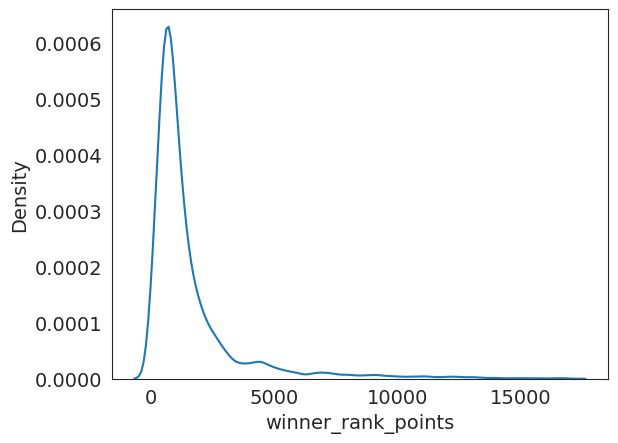

In [87]:
sns.kdeplot(data=winner, x="winner_rank_points")

<AxesSubplot: xlabel='loser_rank_points', ylabel='Density'>

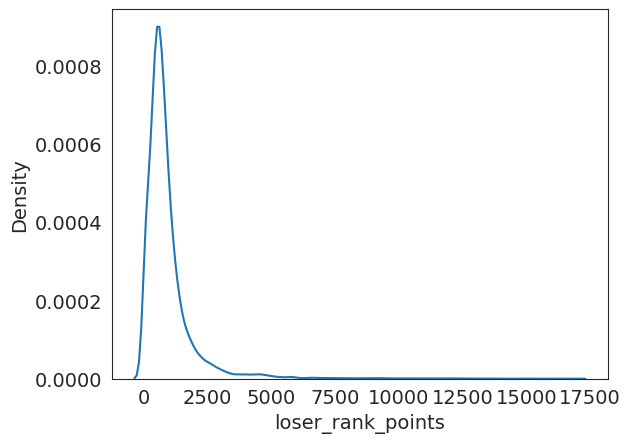

In [88]:
sns.kdeplot(data=looser, x="loser_rank_points")

In [89]:
tennis_df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2013-339,Brisbane,Hard,28,A,20121230,1,105357,NaN,Q,John Millman,R,183.0,AUS,23.548255,105147,NaN,NaN,Tatsuma Ito,R,180.0,JPN,24.621492,6-4 6-1,3,R32,86.0,7.0,6.0,69.0,44.0,33.0,11.0,9.0,3.0,4.0,2.0,5.0,53.0,26.0,19.0,8.0,8.0,3.0,7.0,199.0,239.0,79.0,655.0
1,2013-339,Brisbane,Hard,28,A,20121230,2,103720,NaN,WC,Lleyton Hewitt,R,180.0,AUS,31.849418,103857,NaN,LL,Igor Kunitsyn,R,180.0,RUS,31.252567,6-3 4-6 6-2,3,R32,124.0,8.0,2.0,69.0,34.0,29.0,21.0,13.0,1.0,2.0,7.0,5.0,99.0,53.0,37.0,19.0,14.0,6.0,10.0,83.0,625.0,162.0,339.0
2,2013-339,Brisbane,Hard,28,A,20121230,3,104797,NaN,NaN,Denis Istomin,R,188.0,UZB,26.316222,105373,8.0,NaN,Martin Klizan,L,190.0,SVK,23.474333,6-1 6-2,3,R32,70.0,6.0,2.0,53.0,33.0,28.0,8.0,8.0,2.0,2.0,3.0,3.0,57.0,31.0,19.0,9.0,7.0,9.0,13.0,43.0,897.0,30.0,1175.0
3,2013-339,Brisbane,Hard,28,A,20121230,4,103813,NaN,NaN,Jarkko Nieminen,L,185.0,FIN,31.441478,103898,NaN,NaN,Julien Benneteau,R,185.0,FRA,31.030801,6-3 2-6 6-1,3,R32,104.0,4.0,1.0,94.0,63.0,40.0,15.0,12.0,8.0,11.0,6.0,6.0,70.0,48.0,29.0,7.0,12.0,1.0,6.0,41.0,927.0,35.0,1075.0
4,2013-339,Brisbane,Hard,28,A,20121230,5,103990,NaN,NaN,Tommy Robredo,R,180.0,ESP,30.669405,105992,NaN,Q,Ryan Harrison,R,183.0,USA,20.651608,6-4 7-6(4),3,R32,96.0,6.0,0.0,64.0,50.0,43.0,8.0,11.0,1.0,1.0,4.0,1.0,68.0,39.0,26.0,20.0,11.0,0.0,1.0,114.0,495.0,69.0,710.0


**Plotting the KDE Plot**

**Winner and LoserHeight kde plots viz**
* No difference in Heights



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



Text(0, 0.5, 'Probability Density')

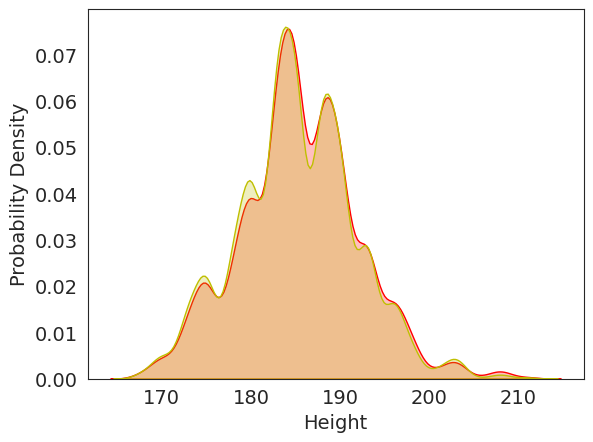

In [90]:
sns.kdeplot(winner.loc[(winner['winner_entry']=='Q'),
			'winner_ht'], color='r', shade=True)

sns.kdeplot(looser.loc[(looser['loser_entry']=='Q'),
			'loser_ht'], color='y', shade=True)

plt.xlabel('Height')
plt.ylabel('Probability Density')

**Winner and Loser rank points kde plots viz**
* Very less difference in rank points



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



Text(0, 0.5, 'Probability Density')

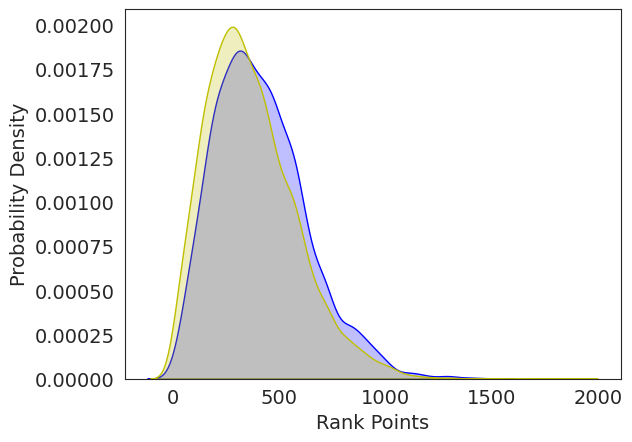

In [91]:
# Plotting the KDE Plot
sns.kdeplot(winner.loc[(winner['winner_entry']=='Q'),
			'winner_rank_points'], color='b', shade=True)

sns.kdeplot(looser.loc[(looser['loser_entry']=='Q'),
			'loser_rank_points'], color='y', shade=True)

plt.xlabel('Rank Points')
plt.ylabel('Probability Density')

**Winner and Loser Age diff kde plots viz**
* No difference in Age




`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



Text(0, 0.5, 'Probability Density')

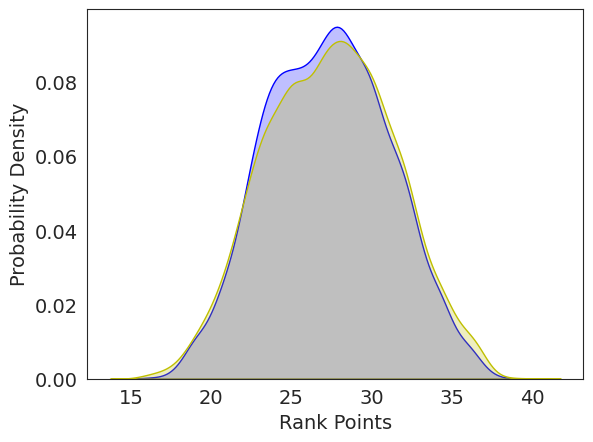

In [92]:
# Plotting the KDE Plot
sns.kdeplot(winner.loc[(winner['winner_ioc']=='FRA'),
			'winner_age'], color='b', shade=True)

sns.kdeplot(looser.loc[(looser['loser_ioc']=='FRA'),
			'loser_age'], color='y', shade=True)

plt.xlabel('Rank Points')
plt.ylabel('Probability Density')

**Winner rank points over the period of ten years**

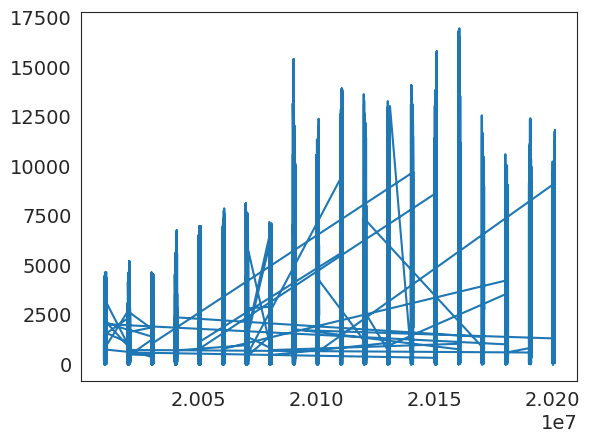

In [93]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = tennis_df['tourney_date']
ypoints = tennis_df['winner_rank_points']

plt.plot(xpoints, ypoints)
plt.show()

**Loser rank points over the period of ten years**

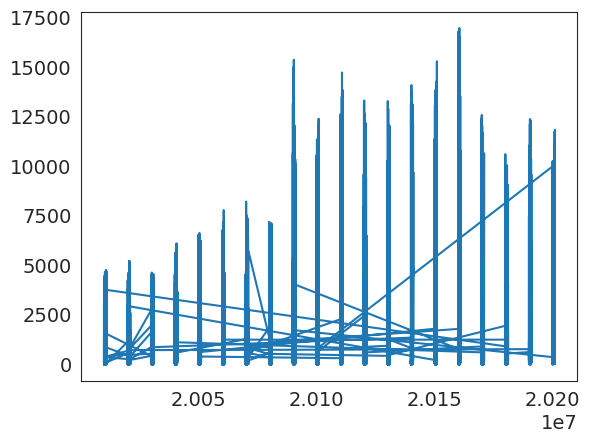

In [94]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = tennis_df['tourney_date']
ypoints = tennis_df['loser_rank_points']

plt.plot(xpoints, ypoints)
plt.show()

# Prediction

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<AxesSubplot: >

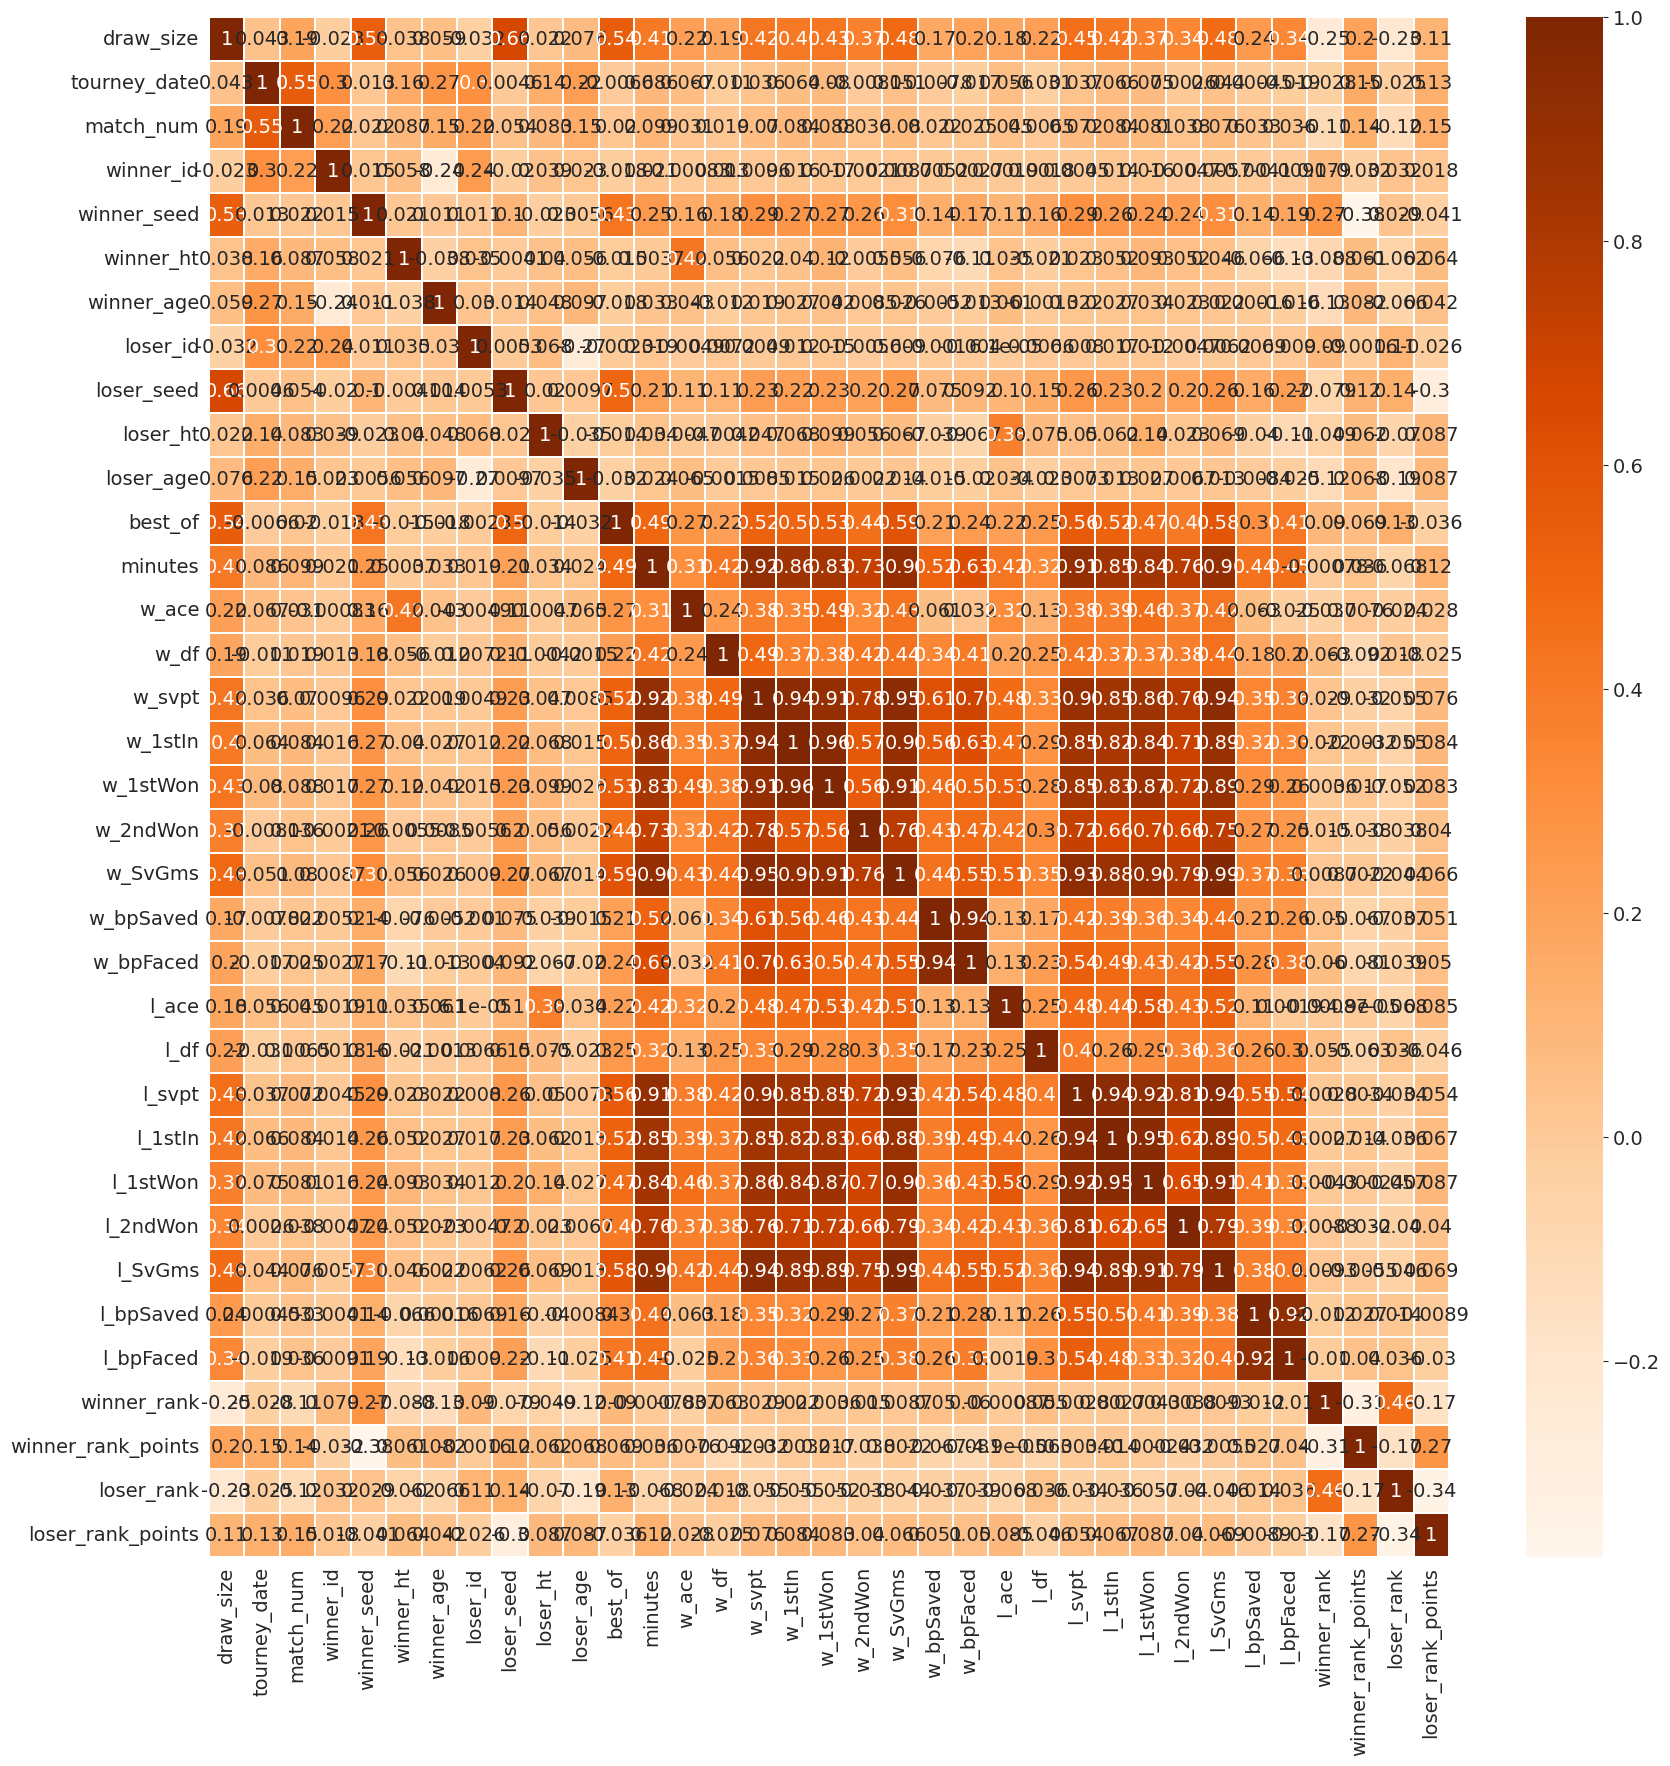

In [95]:
correlation_matrix = tennis_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot= True, linewidth=0.1, cmap= 'Oranges')

**Preprocessing**

In [97]:
df = tennis_df.drop(columns=['score','tourney_name','winner_name',
                      'loser_name','minutes', 'l_1stIn', 'l_1stWon', 'l_2ndWon','l_ace', 'l_svpt',
                      'l_SvGms','l_bpFaced','l_df', 'l_bpSaved',  'w_1stIn', 'w_1stWon','w_2ndWon', 'w_SvGms',
                      'w_ace', 'w_svpt','w_bpFaced', 'w_bpSaved','w_df','winner_rank_points', 'loser_rank_points'])
print("remained features ", df.columns)

remained features  Index(['tourney_id', 'surface', 'draw_size', 'tourney_level', 'tourney_date',
       'match_num', 'winner_id', 'winner_seed', 'winner_entry', 'winner_hand',
       'winner_ht', 'winner_ioc', 'winner_age', 'loser_id', 'loser_seed',
       'loser_entry', 'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age',
       'best_of', 'round', 'winner_rank', 'loser_rank'],
      dtype='object')


In [98]:
none_percent = df.isnull().sum() * 100 / len(df)
none_values_df = pd.DataFrame({'Feature name': df.columns, 'None values count': df.isnull().sum(),
                                 'None values percent': none_percent})
print(none_values_df.reset_index().drop(columns=['index']))

     Feature name  None values count  None values percent
0      tourney_id                  0             0.000000
1         surface                  0             0.000000
2       draw_size                  0             0.000000
3   tourney_level                  0             0.000000
4    tourney_date                  0             0.000000
5       match_num                  0             0.000000
6       winner_id                  0             0.000000
7     winner_seed              34827            58.249845
8    winner_entry              52473            87.763635
9     winner_hand                  7             0.011708
10      winner_ht               2202             3.682952
11     winner_ioc                  0             0.000000
12     winner_age                  2             0.003345
13       loser_id                  0             0.000000
14     loser_seed              46150            77.188112
15    loser_entry              47732            79.834083
16     loser_h

In [99]:
features_to_remove = none_values_df[none_values_df["None values percent"] > 85]
print(features_to_remove)
df = df.drop(columns=features_to_remove['Feature name'].values)

              Feature name  None values count  None values percent
winner_entry  winner_entry              52473            87.763635


In [101]:
numeric_columns = ['winner_rank', 'loser_rank', 'winner_age', 'loser_age', 'winner_ht', 'loser_ht']
df[numeric_columns] = df[numeric_columns].astype(float)

In [102]:
df.tourney_date.head()

0    20121230
1    20121230
2    20121230
3    20121230
4    20121230
Name: tourney_date, dtype: int64

In [103]:
#"tourney_date" is in the format of YYYYMMDD
df['tourney_year'] = df.tourney_date.astype(str).str[:4].astype(int)
df['tourney_month'] = df.tourney_date.astype(str).str[4:6].astype(int)
#Now drop "tourney_date"
df = df.drop(columns=['tourney_date'])

**Feature Engineering**

In [104]:
df = df.rename(columns={"loser_age": "first_age", 
                        "loser_entry": "first_entry", 
                        "loser_hand": "first_hand",
                        "loser_ht": "first_ht", 
                        "loser_id": "first_id", 
                        "loser_ioc": "first_ioc",
                        "loser_rank": "first_rank", 
                        "loser_rank_points": "first_rank_points",
                        "loser_seed": "first_seed",
                        "winner_age": "second_age", 
                        "winner_entry": "second_entry",
                        "winner_hand": "second_hand",
                        "winner_ht": "second_ht", 
                        "winner_id": "second_id", 
                        "winner_ioc": "second_ioc",
                        "winner_rank": "second_rank", 
                        "winner_rank_points": "second_rank_points",
                        "winner_seed": "second_seed",
                       },)

In [105]:
copy_2_df = df.copy()

In [106]:
copy_2_df[[ 'first_age','first_hand','first_ht','first_id','first_ioc','first_rank','first_seed',
            'second_age','second_hand','second_ht','second_id','second_ioc','second_rank','second_seed']]\
=copy_2_df[['second_age','second_hand','second_ht','second_id','second_ioc','second_rank','second_seed',
             'first_age','first_hand','first_ht','first_id','first_ioc','first_rank','first_seed']]

In [107]:
## Construct label feature
winner_player2 = np.zeros(df.shape[0]) # second player wins so label=0
df['label'] = winner_player2


winner_player1 = np.ones(copy_2_df.shape[0]) # first player wins so label=1
copy_2_df['label'] = winner_player1 

df = pd.concat([df,copy_2_df])
#shuffle data
# df = df.sample(frac=1) .reset_index(drop=True)
# df

In [108]:
hand_encoder = LabelEncoder()
df['first_hand'] =(df['first_hand'].astype(str))
df['second_hand'] = (df['second_hand'].astype(str))

df['first_ioc'] = df['first_ioc'].astype(str)
df['second_ioc'] = (df['second_ioc'].astype(str))
df['first_entry'] = (df['first_entry'].astype(str))
df['surface'] = (df['surface'].astype(str))
df['tourney_level'] = (df['tourney_level'].astype(str))
df['tourney_id'] = (df['tourney_id'].astype(str))
df['round'] = (df['round'].astype(str))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119578 entries, 0 to 59788
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tourney_id     119578 non-null  object 
 1   surface        119578 non-null  object 
 2   draw_size      119578 non-null  int64  
 3   tourney_level  119578 non-null  object 
 4   match_num      119578 non-null  int64  
 5   second_id      119578 non-null  int64  
 6   second_seed    38601 non-null   float64
 7   second_hand    119578 non-null  object 
 8   second_ht      112915 non-null  float64
 9   second_ioc     119578 non-null  object 
 10  second_age     119576 non-null  float64
 11  first_id       119578 non-null  int64  
 12  first_seed     38601 non-null   float64
 13  first_entry    119578 non-null  object 
 14  first_hand     119578 non-null  object 
 15  first_ht       112915 non-null  float64
 16  first_ioc      119578 non-null  object 
 17  first_age      119576 non-null

In [109]:
df.head()

,tourney_id,surface,draw_size,tourney_level,match_num,second_id,second_seed,second_hand,second_ht,second_ioc,second_age,first_id,first_seed,first_entry,first_hand,first_ht,first_ioc,first_age,best_of,round,second_rank,first_rank,tourney_year,tourney_month,label
0,2013-339,Hard,28,A,1,105357,NaN,R,183.0,AUS,23.548255,105147,NaN,nan,R,180.0,JPN,24.621492,3,R32,199.0,79.0,2012,12,0.0
1,2013-339,Hard,28,A,2,103720,NaN,R,180.0,AUS,31.849418,103857,NaN,LL,R,180.0,RUS,31.252567,3,R32,83.0,162.0,2012,12,0.0
2,2013-339,Hard,28,A,3,104797,NaN,R,188.0,UZB,26.316222,105373,8.0,nan,L,190.0,SVK,23.474333,3,R32,43.0,30.0,2012,12,0.0
3,2013-339,Hard,28,A,4,103813,NaN,L,185.0,FIN,31.441478,103898,NaN,nan,R,185.0,FRA,31.030801,3,R32,41.0,35.0,2012,12,0.0
4,2013-339,Hard,28,A,5,103990,NaN,R,180.0,ESP,30.669405,105992,NaN,Q,R,183.0,USA,20.651608,3,R32,114.0,69.0,2012,12,0.0


In [110]:
hand_encoder = LabelEncoder()
df['first_hand'] = hand_encoder.fit_transform(df['first_hand'])
df['second_hand'] = hand_encoder.transform(df['second_hand'])

df['first_ioc'] = LabelEncoder().fit_transform(df['first_ioc'])
df['second_ioc'] = LabelEncoder().fit_transform(df['second_ioc'])
df['first_entry'] = LabelEncoder().fit_transform(df['first_entry'])
df['surface'] = LabelBinarizer().fit_transform(df['surface'] )
df['tourney_level'] = LabelEncoder().fit_transform(df['tourney_level'] )
df['tourney_id'] = LabelEncoder().fit_transform(df['tourney_id'])
df['round'] = LabelEncoder().fit_transform(df['round'])

In [113]:
df.head()

,tourney_id,surface,draw_size,tourney_level,match_num,second_id,second_seed,second_hand,second_ht,second_ioc,second_age,first_id,first_seed,first_entry,first_hand,first_ht,first_ioc,first_age,best_of,round,second_rank,first_rank,tourney_year,tourney_month,label
0,1810,0,28,0,1,105357,NaN,1,183.0,5,23.548255,105147,NaN,8,1,180.0,54,24.621492,3,6,199.0,79.0,2012,12,0.0
1,1810,0,28,0,2,103720,NaN,1,180.0,5,31.849418,103857,NaN,2,1,180.0,88,31.252567,3,6,83.0,162.0,2012,12,0.0
2,1810,0,28,0,3,104797,NaN,1,188.0,110,26.316222,105373,8.0,8,0,190.0,95,23.474333,3,6,43.0,30.0,2012,12,0.0
3,1810,0,28,0,4,103813,NaN,0,185.0,35,31.441478,103898,NaN,8,1,185.0,36,31.030801,3,6,41.0,35.0,2012,12,0.0
4,1810,0,28,0,5,103990,NaN,1,180.0,33,30.669405,105992,NaN,4,1,183.0,109,20.651608,3,6,114.0,69.0,2012,12,0.0


In [115]:
df_imputed = pd.DataFrame(SimpleImputer().fit_transform(df))
df_imputed.columns = df.columns
df_imputed.index = df.index
df = df_imputed.copy()

In [116]:
print('Final shape of data after cleaning and preprocessing: ', df.shape)

Final shape of data after cleaning and preprocessing:  (119578, 25)


In [117]:
y = df['label']
df_X = df.drop(columns='label')

In [118]:
# split data : 80% for train and 20% for test.
X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=0.1)

In [119]:
#Call the classifier
RF_classifier = RandomForestClassifier(n_estimators=100)
#fit the data
RF_classifier.fit(X_train, y_train)
#predict 
RF_predictions = RF_classifier.predict(X_test)

In [121]:
print('Confusion matrix')
print(confusion_matrix(y_test,RF_predictions))
print('Classification report')
print(classification_report(y_test,RF_predictions))
print('Accuracy= ', accuracy_score(y_test, RF_predictions))

Confusion matrix
[[4204 1716]
 [1891 4147]]
Classification report
              precision    recall  f1-score   support

         0.0       0.69      0.71      0.70      5920
         1.0       0.71      0.69      0.70      6038

    accuracy                           0.70     11958
   macro avg       0.70      0.70      0.70     11958
weighted avg       0.70      0.70      0.70     11958

Accuracy=  0.6983609299213915


In [122]:
#Call the classifier
XGB_classifier = XGBClassifier()
#fit the data
XGB_classifier.fit(X_train, y_train)
#predict 
XGB_predictions = XGB_classifier.predict(X_test)

In [123]:
print('Confusion matrix')
print(confusion_matrix(y_test,XGB_predictions))
print('Classification report')
print(classification_report(y_test,XGB_predictions))
print('Accuracy= ', accuracy_score(y_test, XGB_predictions))

Confusion matrix
[[4250 1670]
 [1794 4244]]
Classification report
              precision    recall  f1-score   support

         0.0       0.70      0.72      0.71      5920
         1.0       0.72      0.70      0.71      6038

    accuracy                           0.71     11958
   macro avg       0.71      0.71      0.71     11958
weighted avg       0.71      0.71      0.71     11958

Accuracy=  0.7103194514132798
